# Understanding fit results: post-fit distributions

_Valerio Ippolito - INFN Sezione di Roma_
_Michele Pinamonti - INFN Sezione di Trieste_

HistFactory creates observables with a standard naming, like `obs_x_ljets_HThad_5j3b`, so we may plot data in this variable, superimposing the result of the fit of the _overall signal plus background model_ (S+B model) to the full data in the different categories. The PDF representing this overall model is called by HistFactory `simPdf`.

We will actually do two things:
- fit with the S+B model (red PDF)
- fit with the B-only model (blue PDF)

Open workspace file, extract workspace, get data

In [10]:
f = new TFile("../ws/ATLASIT_prova_combined_ATLASIT_prova_model.root");
w = dynamic_cast<RooWorkspace*>(f->Get("combined"));

dataset = w->data("obsData");

Create Canvas, plot the data

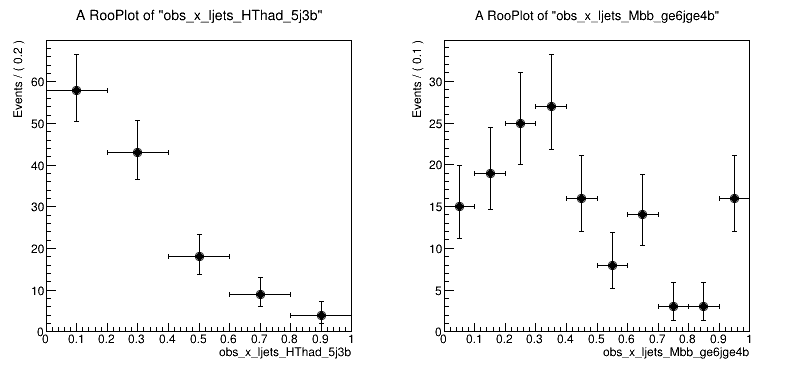

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [12]:
c = new TCanvas("c", "c", 800, 400);
c->Divide(2, 1);

cat = w->cat("channelCat");

frame = w->var("obs_x_ljets_HThad_5j3b")->frame();
dataset->plotOn(frame, RooFit::Name("observed data"), RooFit::Cut("channelCat==channelCat::ljets_HThad_5j3b"));

frame2 = w->var("obs_x_ljets_Mbb_ge6jge4b")->frame();
dataset->plotOn(frame2, RooFit::Name("observed data"), RooFit::Cut("channelCat==channelCat::ljets_Mbb_ge6jge4b"));

c->cd(1);
frame->Draw();
c->cd(2);
frame2->Draw();

c->Draw();

Perform a S+B fit (in a silent mode), and plot (in red) the post-fit distribution)

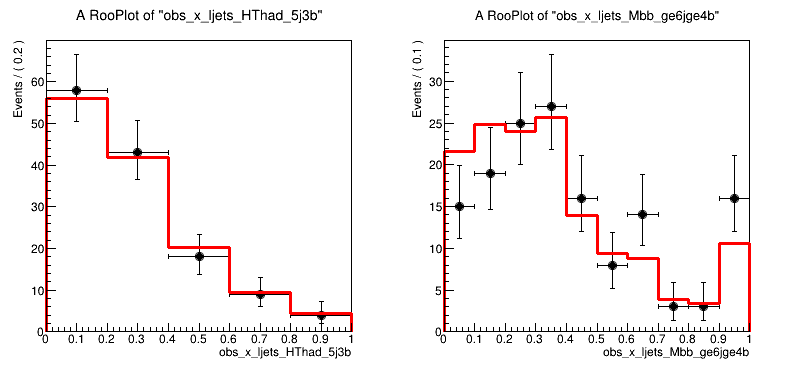

In [15]:
RooMsgService::instance().setGlobalKillBelow(RooFit::FATAL);
w->var("mu_ttH")->setVal(0);
w->var("mu_ttH")->setConstant(kFALSE);
w->pdf("simPdf")->fitTo(*dataset,RooFit::PrintLevel(-1));

w->pdf("simPdf")->plotOn(frame, RooFit::Slice(*cat, "ljets_HThad_5j3b"), RooFit::ProjWData(*cat, *dataset), RooFit::Name("PDF after S+B fit"), RooFit::LineColor(kRed));
w->pdf("simPdf")->plotOn(frame2, RooFit::Slice(*cat, "ljets_Mbb_ge6jge4b"), RooFit::ProjWData(*cat, *dataset), RooFit::Name("PDF after S+B fit"), RooFit::LineColor(kRed));

c->cd(1);
frame->Draw();
c->cd(2);
frame2->Draw();

c->Draw();

And now do a B-only fit, and plot the post-fit distribution in blue

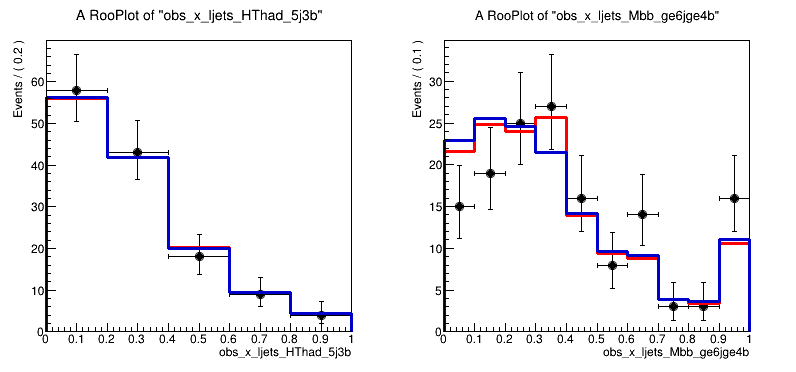

In [18]:
w->var("mu_ttH")->setVal(0);
w->var("mu_ttH")->setConstant(kTRUE);
w->pdf("simPdf")->fitTo(*dataset,RooFit::PrintLevel(-1));

w->pdf("simPdf")->plotOn(frame, RooFit::Slice(*cat, "ljets_HThad_5j3b"), RooFit::ProjWData(*cat, *dataset), RooFit::Name("PDF after B-only fit"), RooFit::LineColor(kBlue+1));
w->pdf("simPdf")->plotOn(frame2, RooFit::Slice(*cat, "ljets_Mbb_ge6jge4b"), RooFit::ProjWData(*cat, *dataset), RooFit::Name("PDF after B-only fit"), RooFit::LineColor(kBlue+1));

c->cd(1);
frame->Draw();
c->cd(2);
frame2->Draw();

c->Draw();